In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
input_csv_file = 'prompt.csv'

In [171]:
df = pd.read_csv(input_csv_file)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [172]:
df

,timestamp,OpenAI_gpt-3.5-turbo-0613 success,OpenAI_gpt-3.5-turbo-0613 input_characters,OpenAI_gpt-3.5-turbo-0613 output_characters,OpenAI_gpt-3.5-turbo-0613 first_token_time_seconds,OpenAI_gpt-3.5-turbo-0613 first_sentence_time_seconds,OpenAI_gpt-3.5-turbo-0613 total_request_time_seconds,OpenAI_gpt-3.5-turbo-0613 chunks_time_seconds,OpenAI_gpt-3.5-turbo-0125 success,OpenAI_gpt-3.5-turbo-0125 input_characters,...,Azure_gpt-4-1106-preview first_sentence_time_seconds,Azure_gpt-4-1106-preview total_request_time_seconds,Azure_gpt-4-1106-preview chunks_time_seconds,Azure_gpt-3.5-turbo-0613 success,Azure_gpt-3.5-turbo-0613 input_characters,Azure_gpt-3.5-turbo-0613 output_characters,Azure_gpt-3.5-turbo-0613 first_token_time_seconds,Azure_gpt-3.5-turbo-0613 first_sentence_time_seconds,Azure_gpt-3.5-turbo-0613 total_request_time_seconds,Azure_gpt-3.5-turbo-0613 chunks_time_seconds
0,2024-04-12 10:32:28.690452,True,250,595,0.406917,0.473772,1.757919,"[0.018105030059814453, 0.00023412704467773438,...",True,250,...,2.685663,3.744560,"[0.0007190704345703125, 2.1018309593200684, 0....",True,250,595,0.729682,0.745702,1.701160,"[0.0013899803161621094, 0.43277812004089355, 0..."
1,2024-04-12 10:33:32.321344,True,500,1078,0.447084,0.516867,2.842157,"[0.03412795066833496, 0.00022792816162109375, ...",True,500,...,3.912838,7.247259,"[0.0003521442413330078, 3.189006805419922, 0.0...",True,500,924,1.095441,1.097767,4.479877,"[0.0004208087921142578, 0.6646468639373779, 0...."
2,2024-04-12 10:35:08.230712,True,750,978,0.359748,0.682163,2.700503,"[0.03976893424987793, 0.0002980232238769531, 0...",True,750,...,10.650397,43.025770,"[0.0005309581756591797, 4.4014317989349365, 0....",True,750,934,0.838539,0.845729,2.853482,"[0.0005631446838378906, 0.4917268753051758, 0...."
3,2024-04-12 10:35:56.855412,True,1000,187,0.422460,0.701595,1.031747,"[0.024457931518554688, 0.0001747608184814453, ...",True,1000,...,12.388580,31.532643,"[0.00016307830810546875, 5.888681888580322, 0....",True,1000,888,1.117608,1.123482,2.775680,"[0.0005488395690917969, 0.6024661064147949, 0...."
4,2024-04-12 10:36:43.875453,True,1250,11,0.362658,0.374280,0.375031,"[0.023188114166259766, 0.00043702125549316406,...",True,1250,...,11.359670,18.417150,"[0.0007359981536865234, 5.245118856430054, 0.0...",True,1250,11,0.606627,0.607746,0.633095,"[0.0005471706390380859, 0.08650088310241699, 0..."
5,2024-04-12 10:37:54.132500,True,1500,1126,1.463833,1.506023,4.029894,"[0.028048992156982422, 0.00013494491577148438,...",True,1500,...,4.377879,28.552338,"[0.0003421306610107422, 3.438652992248535, 6.5...",True,1500,934,0.992177,0.993239,2.837454,"[0.000682830810546875, 0.4890758991241455, 0.0..."
6,2024-04-12 10:38:51.674131,True,1750,1135,0.692677,1.036232,3.713111,"[0.0328068733215332, 0.0002720355987548828, 0....",True,1750,...,3.436751,25.953667,"[0.0002722740173339844, 2.7223103046417236, 0....",True,1750,1135,0.977647,0.994755,4.599006,"[0.0007250308990478516, 0.5814220905303955, 0...."
7,2024-04-12 10:39:49.107835,True,2000,1264,0.655995,0.745568,3.820566,"[0.040331125259399414, 0.00022101402282714844,...",True,2000,...,11.004727,23.250058,"[0.002095937728881836, 10.036104917526245, 0.0...",True,2000,1154,0.932701,0.935583,4.327920,"[0.0005402565002441406, 0.5145153999328613, 0...."
8,2024-04-12 10:41:56.684841,True,2250,1231,0.332643,0.521341,3.169202,"[0.00584864616394043, 0.0002980232238769531, 0...",True,2250,...,0.000000,0.000000,[],True,2250,1231,0.522176,0.526229,2.972050,"[0.0007660388946533203, 0.19036579132080078, 0..."
9,2024-04-12 10:42:17.365246,True,2500,1027,0.703108,0.851974,2.951952,"[0.02816176414489746, 0.00019598007202148438, ...",True,2500,...,4.379154,20.502789,"[0.00045013427734375, 3.1703622341156006, 0.00...",True,2500,1005,0.892015,0.896896,3.435983,"[0.0005939006805419922, 0.41945886611938477, 0..."


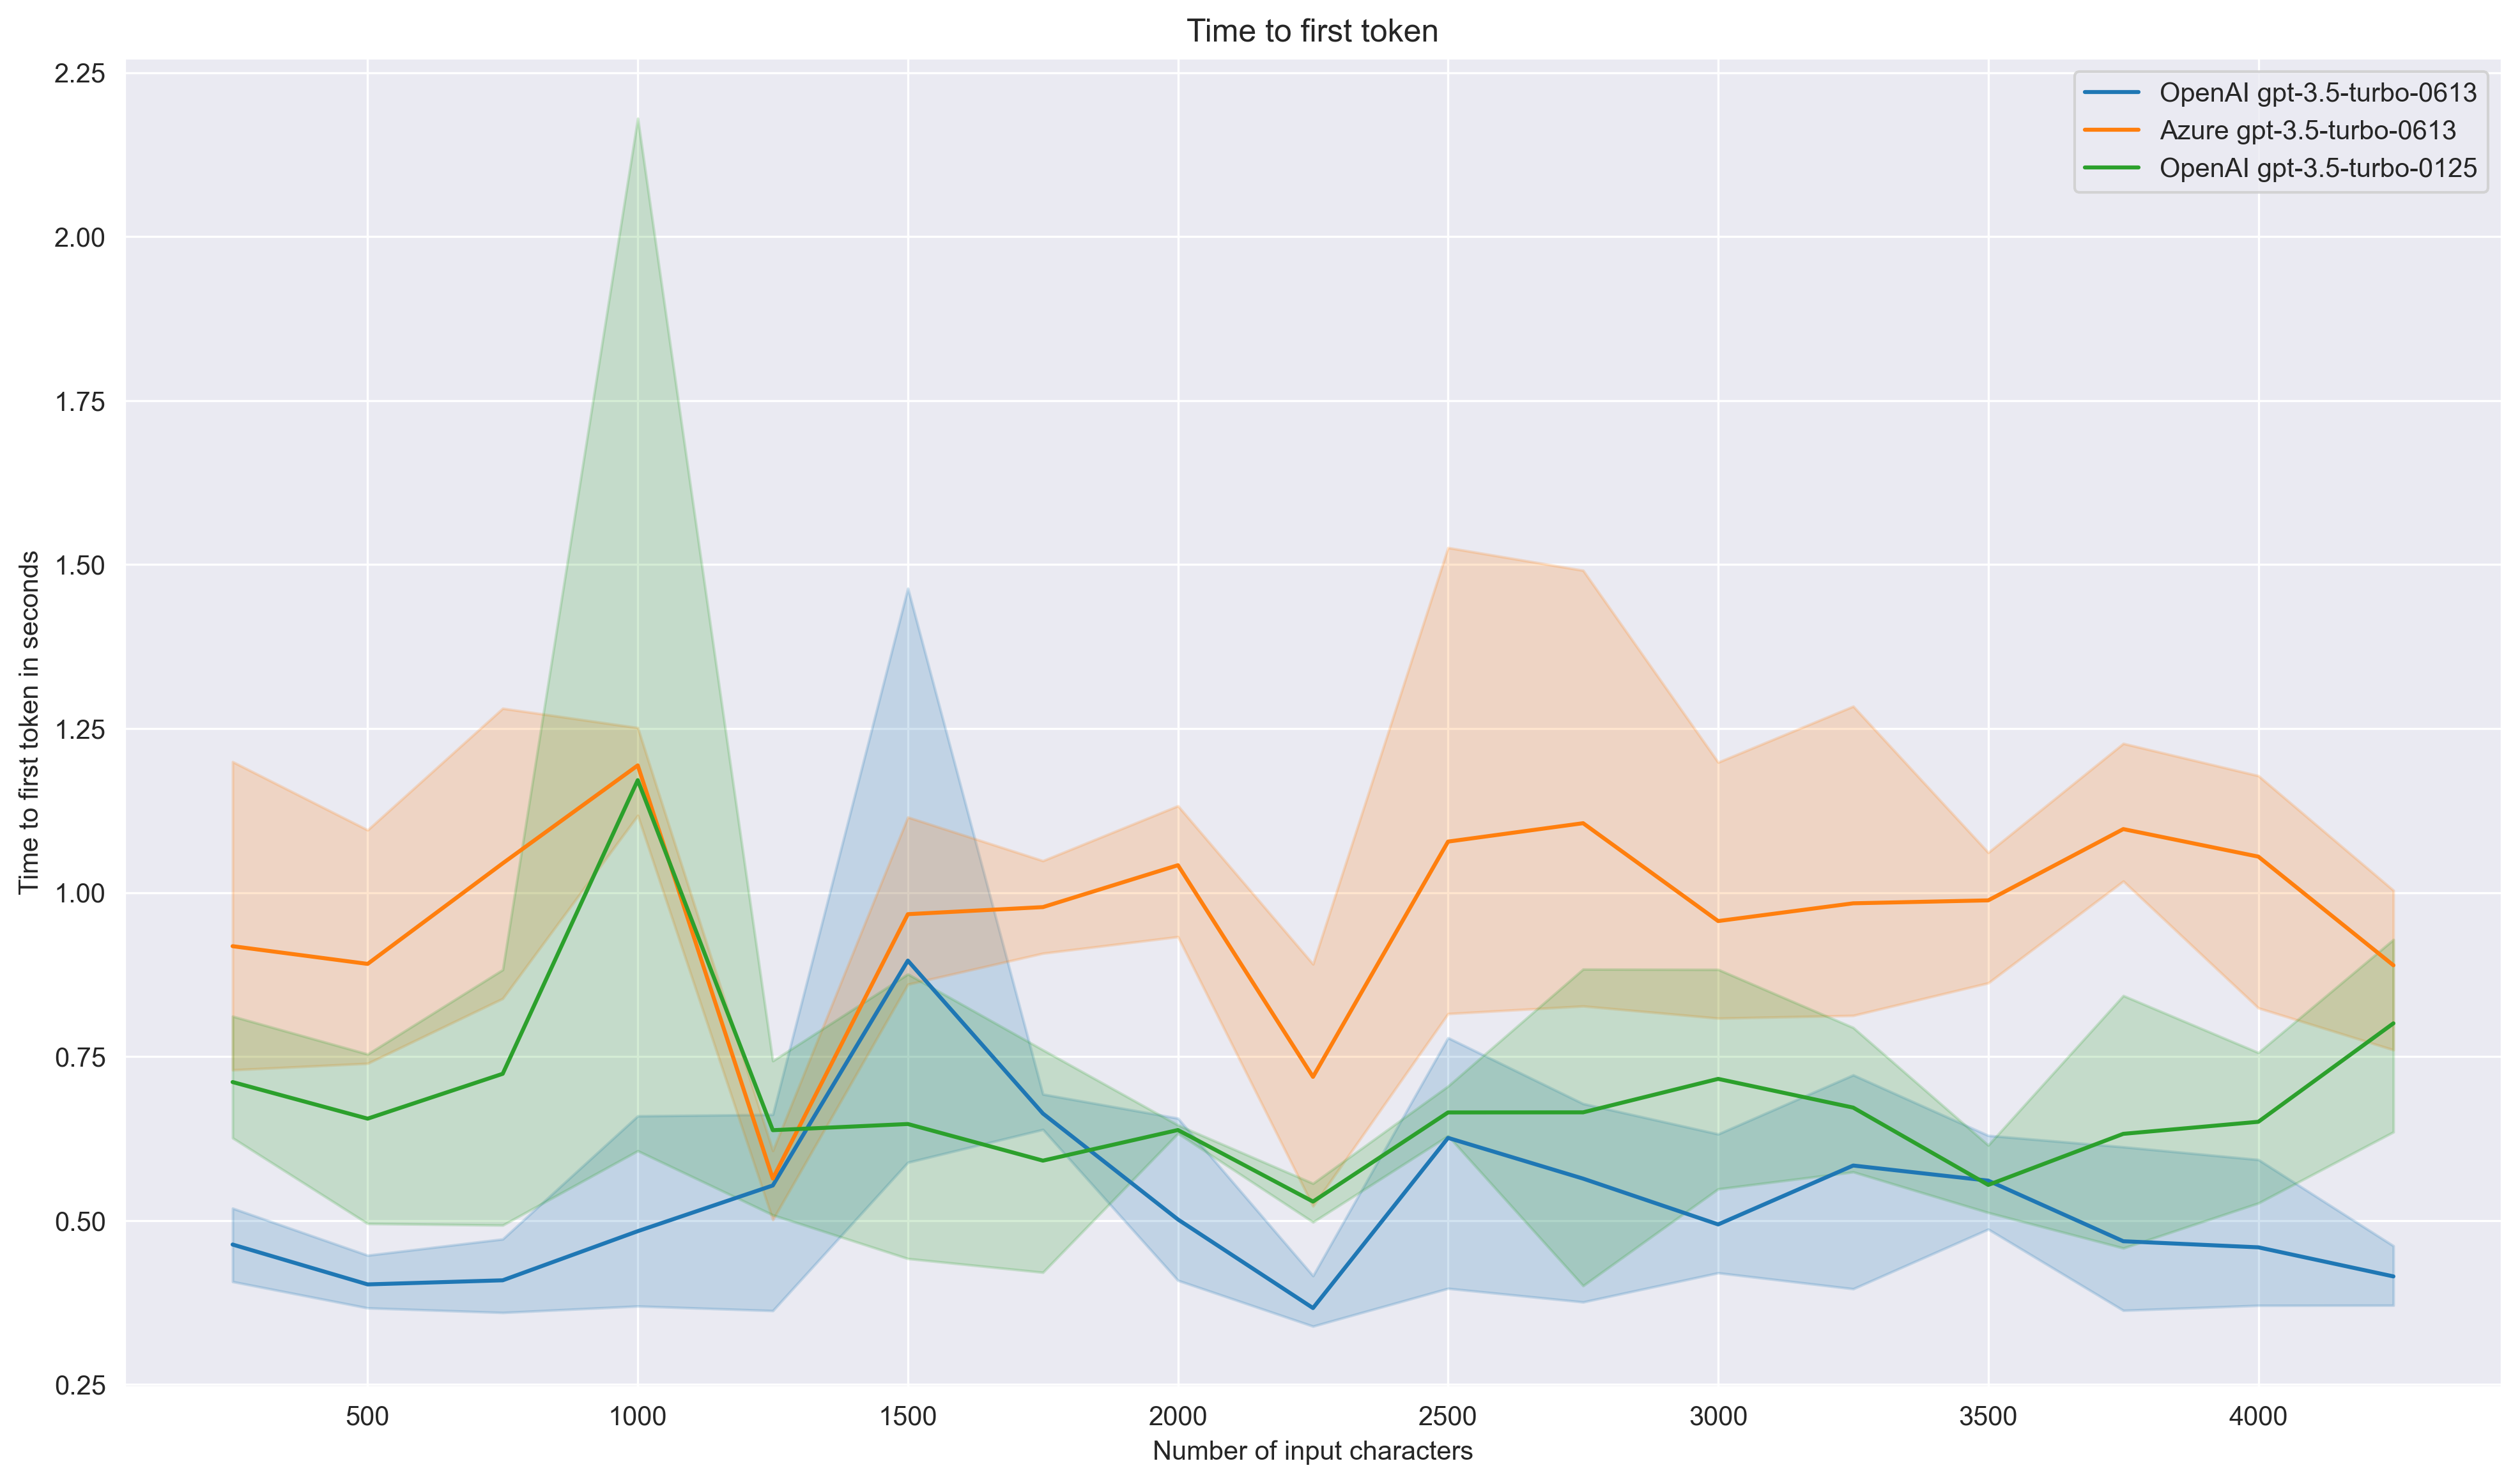

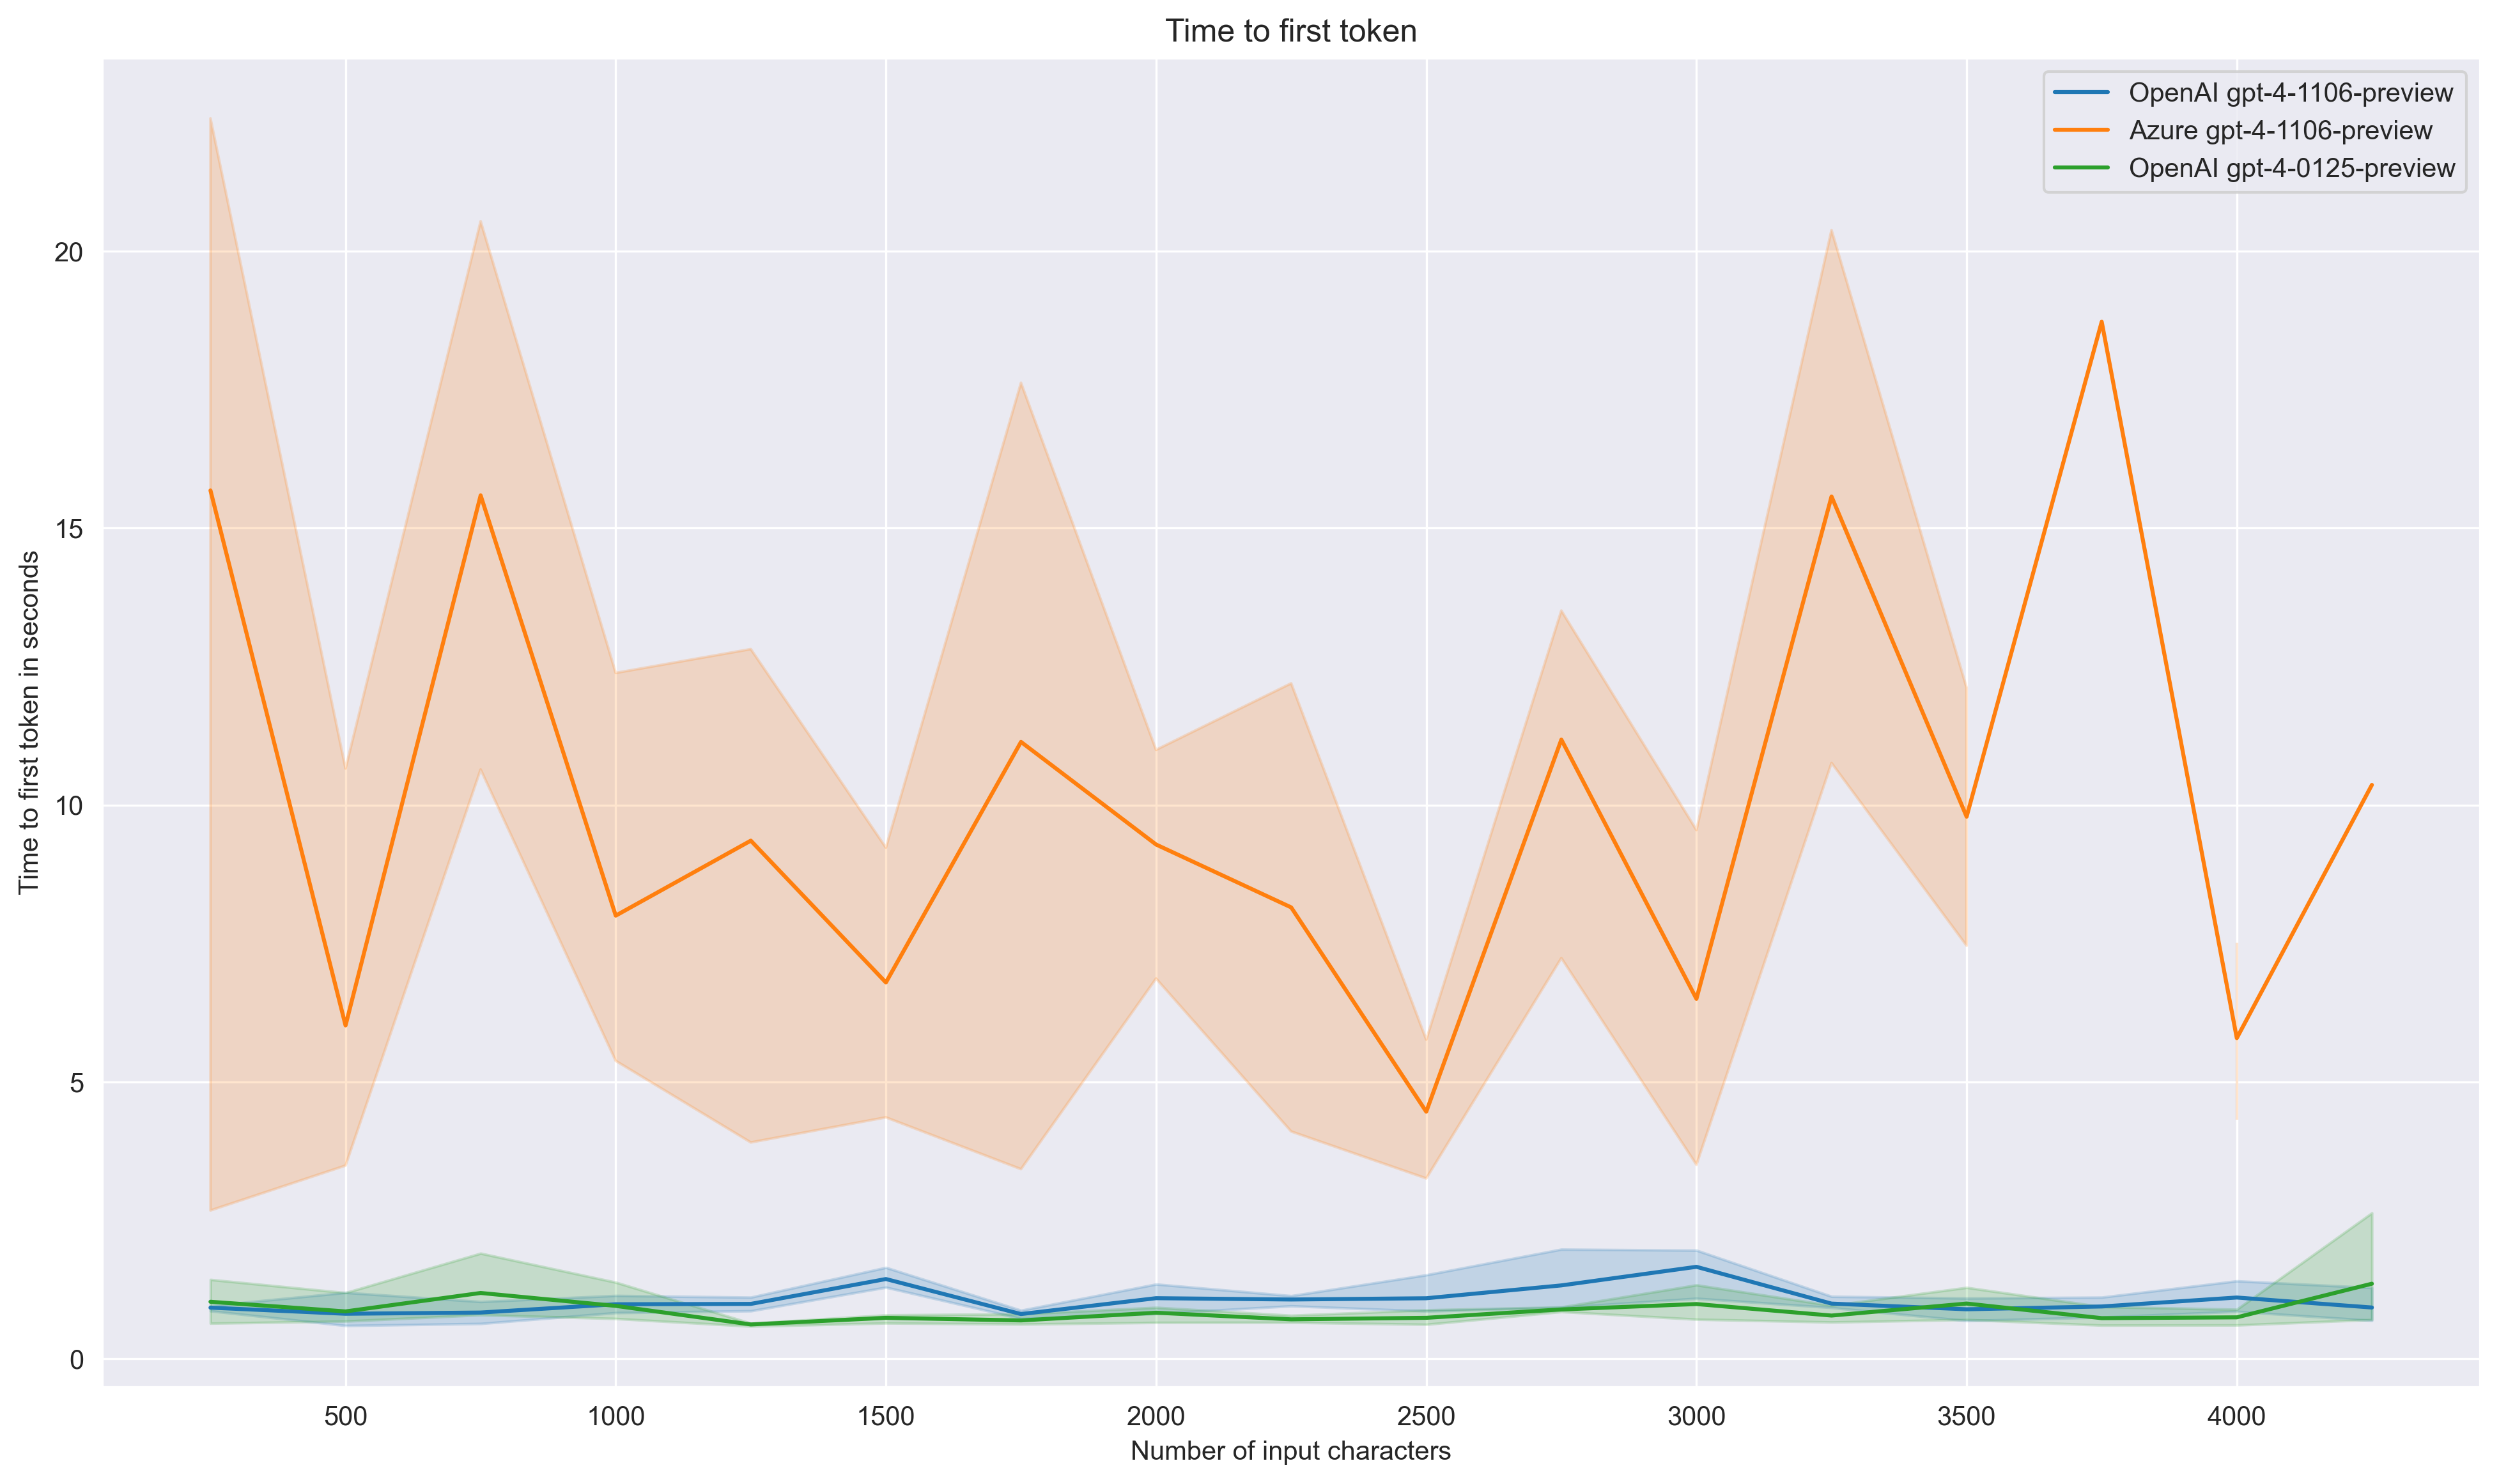

In [173]:
gpt_4_models = ["gpt-4-1106-preview", "gpt-4-0125-preview"]
gpt_3_models = ["gpt-3.5-turbo-0613", "gpt-3.5-turbo-0125"]

def num_input_tokens_for_model(models, output_src):
    providers = ["OpenAI", "Azure"]
    
    plt.figure(figsize=(16, 9), dpi=300)
    
    for model in models:
        for provider in providers:
            
            column_name = f'{provider}_{model} input_characters'
            data_column_name = f'{provider}_{model} first_token_time_seconds'
            success_column_name = f'{provider}_{model} success'
                        
            if column_name not in df.columns:
                continue
            
            filtered_df = df[df[success_column_name] == True]
            sns.lineplot(x=column_name, y=data_column_name, data=filtered_df, label=f'{provider} {model}')
            
    plt.xlabel('Number of input characters')
    plt.ylabel('Time to first token in seconds')
    plt.title("Time to first token")
    plt.savefig(output_src)
    plt.show()
    plt.close()


num_input_tokens_for_model(gpt_3_models, "misc/prompt_size_vs_first_token_time_seconds_gpt_3.png")
num_input_tokens_for_model(gpt_4_models, "misc/prompt_size_vs_first_token_time_seconds_gpt_4.png")